In [1]:
import os 
import numpy as np 
from keras.preprocessing import image
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline

from pre_trained_network_architecture import PreTrainedModelArchitecture
from image_utils import ImageUtils

Using TensorFlow backend.


In [2]:
image_utils = ImageUtils()

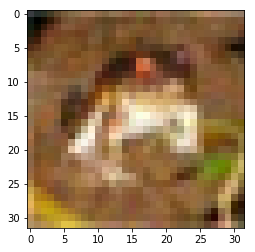

In [3]:
a = image_utils.json_filename_to_array(image_utils.IMAGES_DIR + '/not_stegged/image0.json')
image_utils.show_img_array_in_notebook(a)

In [4]:
pre_trained_network_architecture = PreTrainedModelArchitecture()

In [11]:
from keras.layers import Dense
from keras.models import Model

In [6]:
model = pre_trained_network_architecture.model

In [7]:
model.input

<tf.Tensor 'conv2d_1_input:0' shape=(?, 32, 32, 3) dtype=float32>

In [8]:
model.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
conv2d_1 (Conv2D)                                                  (None, 32, 32, 64)                                          1792                   
______________________________________________________________________________________________________________________________________________________
activation_1 (Activation)                                          (None, 32, 32, 64)                                          0                      
______________________________________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)                         (None, 32, 32, 64)         

In [9]:
model.layers.pop()
model.layers.pop()

model.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
conv2d_1 (Conv2D)                                                  (None, 32, 32, 64)                                          1792                   
______________________________________________________________________________________________________________________________________________________
activation_1 (Activation)                                          (None, 32, 32, 64)                                          0                      
______________________________________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)                         (None, 32, 32, 64)         

In [14]:
new_dense_layer = Dense(10, activation='relu', name='new_dense_layer')
new_binary_classification_layer = Dense(1, activation='sigmoid', name='new_binary_classification_layer')

inp = model.input
middle = new_dense_layer(model.layers[-1].output)
out = new_binary_classification_layer(middle)

model2 = Model(inp, out)
model2.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
conv2d_1_input (InputLayer)                                        (None, 32, 32, 3)                                           0                      
______________________________________________________________________________________________________________________________________________________
conv2d_1 (Conv2D)                                                  (None, 32, 32, 64)                                          1792                   
______________________________________________________________________________________________________________________________________________________
activation_1 (Activation)                                          (None, 32, 32, 64)         

In [15]:
model2.predict(np.array([a]))

array([[ 0.45208338]], dtype=float32)